# **Abstract**

This dataset represents a synthetic collection of data generated to simulate house prices in an urban context, specifically modeled after the imaginary real estate market in Paris. It serves as a fictional yet structured representation of housing-related information, offering insights into various attributes such as square meters, number of rooms, yard and pool presence, and other features associated with residential properties. While the data is not derived from actual observations, it provides a valuable and controlled environment for testing and understanding statistical methods and machine learning models applied to housing datasets.



# **Dataset**

The above dataset has 18 columns with 17 numerical and 1 categorical columns.

It consists of following columns

i) squareMeters: Total square meters of the house.

ii) numberOfRooms: Number of rooms in the house.

iii) hasYard: Binary indicator (1 or 0) for whether the house has a yard.

iv) hasPool: Binary indicator (1 or 0) for whether the house has a pool.

v) floors: Number of floors in the house.

vi) cityCode: Zip code of the house location.

vii) cityPartRange: Range indicating the exclusivity of the neighborhood (higher range, more exclusive).

viii) numPrevOwners: Number of previous owners of the house.

ix) made: Year the house was built.

x) isNewBuilt: Binary indicator (1 or 0) for whether the house is newly built.

xi) hasStormProtector: Binary indicator (1 or 0) for whether the house has a storm protector.

xii) basement: Square meters of the basement in the house.

xiii) attic: Square meters of the attic in the house.

xiv) garage: Size of the garage.

xv) hasStorageRoom: Binary indicator (1 or 0) for whether the house has a storage room.

xvi) hasGuestRoom: Number of guest rooms in the house.

xvii) price: Price of the house.

xviii) category: Categorization of the house as "Luxury" or "Basic."

In [1]:
!pip install patool

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 1.5 MB/s eta 0:00:00


Using Patoolib to extract the zip file

In [2]:
import patoolib
import numpy as np
import pandas as pd
import seaborn as sb
from scipy import stats
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from statsmodels.graphics.gofplots import qqplot
from sklearn.feature_selection import RFE

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer

In [3]:
patoolib.extract_archive('ParisHousing.zip')

INFO patool: Extracting ParisHousing.zip ...
INFO:patool:Extracting ParisHousing.zip ...
INFO patool: running /usr/bin/7z x -o./Unpack_amk_e0fn -- ParisHousing.zip
INFO:patool:running /usr/bin/7z x -o./Unpack_amk_e0fn -- ParisHousing.zip
INFO patool:     with input=''
INFO:patool:    with input=''
INFO patool: ... ParisHousing.zip extracted to `ParisHousing' (multiple files in root).
INFO:patool:... ParisHousing.zip extracted to `ParisHousing' (multiple files in root).


'ParisHousing'

In [4]:
df = pd.read_csv('ParisHousing/ParisHousingClass.csv')

In [5]:
df.dtypes

squareMeters           int64
numberOfRooms          int64
hasYard                int64
hasPool                int64
floors                 int64
cityCode               int64
cityPartRange          int64
numPrevOwners          int64
made                   int64
isNewBuilt             int64
hasStormProtector      int64
basement               int64
attic                  int64
garage                 int64
hasStorageRoom         int64
hasGuestRoom           int64
price                float64
category              object
dtype: object

In [6]:
# Identify categorical and numerical features
categorical_features = df.select_dtypes(include=["object"]).columns
numerical_features = df.select_dtypes(exclude=["object"]).columns

print("Categorical features:", categorical_features)
print("Numerical features:", numerical_features)

Categorical features: Index(['category'], dtype='object')
Numerical features: Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price'],
      dtype='object')


In [7]:
df

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Basic
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.9,Basic
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.0,Basic
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.5,Basic
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107.0,Basic


In [8]:
# prompt: Using dataframe df: Group the category by 'Basic' or 'Luxury' and find the average price for the house in each category

df.groupby('category')['price'].mean()


category
Basic     5.005929e+06
Luxury    4.907260e+06
Name: price, dtype: float64

In [9]:
df.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
category             0
dtype: int64

In [10]:
columns = df.columns

In [11]:
columns.size, columns

(18,
 Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
        'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
        'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
        'hasGuestRoom', 'price', 'category'],
       dtype='object'))

In [12]:
df['category']

0        Basic
1       Luxury
2        Basic
3        Basic
4       Luxury
         ...  
9995     Basic
9996     Basic
9997     Basic
9998     Basic
9999     Basic
Name: category, Length: 10000, dtype: object

In [13]:
df.groupby('category')['price'].mean()

category
Basic     5.005929e+06
Luxury    4.907260e+06
Name: price, dtype: float64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

# Encoding Categorical value

In [15]:
# Encoding categorical values using Label Encoder

encoder = LabelEncoder()
df['category'] = encoder.fit_transform(df['category'])
df

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,0
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,1
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,0
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,0
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.9,0
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.0,0
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.5,0
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107.0,0


# Correlation Matrix

<Axes: >

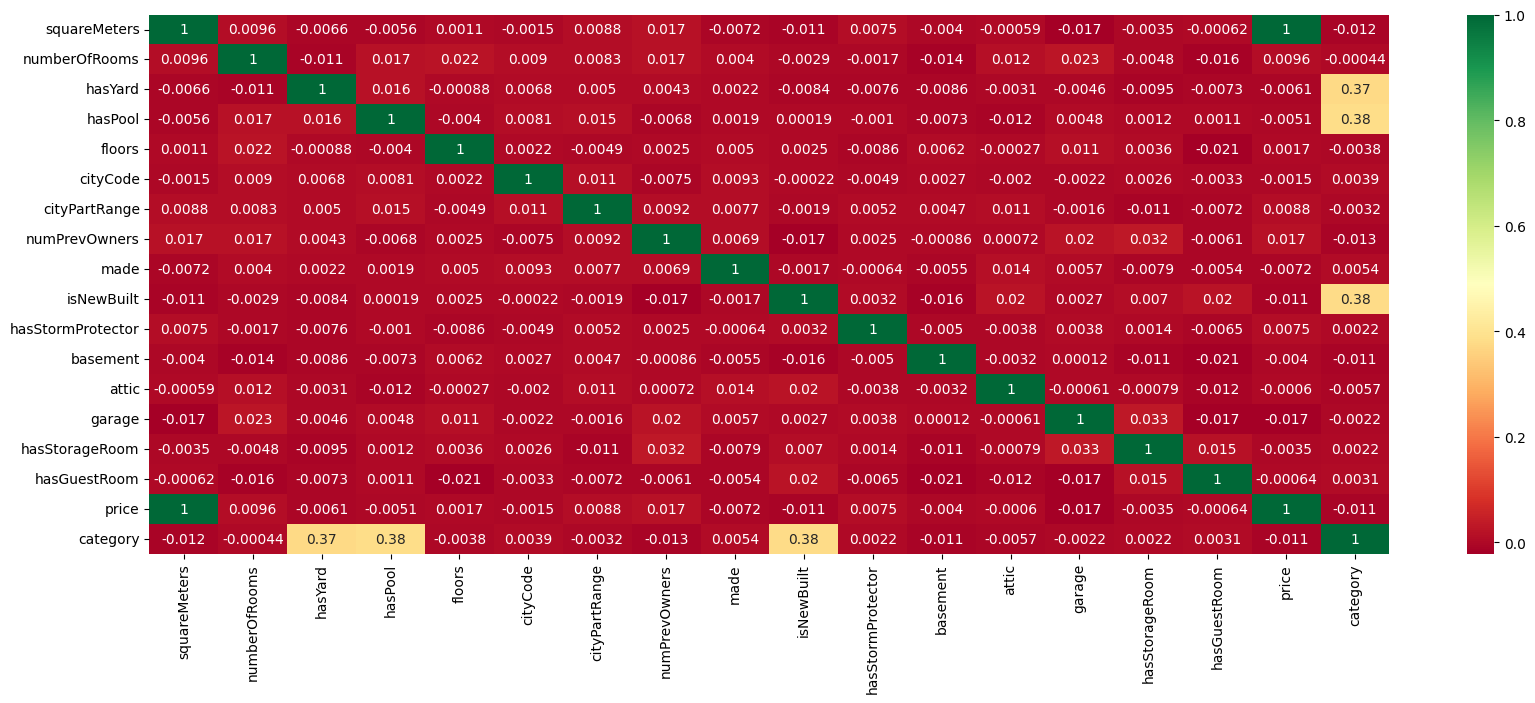

In [16]:
# Correlation Matrix

correlation_matrix = df.corr()
plt.figure(figsize=(20, 7))
sb.heatmap(correlation_matrix, annot=True, cmap="RdYlGn")

The `correlation_matrix` describes that there is a strong correlation between `category` and `hasYard`, `hasPool`, `isNewBuilt`.

In [17]:
# Sorting values based on strong correlation

correlation_matrix['category'].sort_values(ascending=False)

category             1.000000
hasPool              0.382995
isNewBuilt           0.381237
hasYard              0.373987
made                 0.005399
cityCode             0.003950
hasGuestRoom         0.003110
hasStorageRoom       0.002229
hasStormProtector    0.002182
numberOfRooms       -0.000442
garage              -0.002218
cityPartRange       -0.003171
floors              -0.003827
attic               -0.005729
basement            -0.011310
price               -0.011399
squareMeters        -0.011800
numPrevOwners       -0.012843
Name: category, dtype: float64

Here we could see `hasPool`, `isNewBuilt`, and `hasYard` variables have the highest correlation with the `category` variable.

# OLS Regression

In [18]:
# Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(
    df['category'],
    df.drop('category', axis=1),
).fit()

# Print out the statistics
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:               category   R-squared (uncentered):                   0.502
Model:                            OLS   Adj. R-squared (uncentered):              0.501
Method:                 Least Squares   F-statistic:                              592.3
Date:                Wed, 31 Jan 2024   Prob (F-statistic):                        0.00
Time:                        20:44:22   Log-Likelihood:                         -364.61
No. Observations:               10000   AIC:                                      763.2
Df Residuals:                    9983   BIC:                                      885.8
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

# Recursive Feature Elimination (RFE)

In [19]:
model = RandomForestClassifier()

rfe = RFE(model, n_features_to_select=5)
fit = rfe.fit(df.drop('category', axis=1), df['category'])

selected_features_rfe = df.drop('category', axis=1).columns[fit.support_].tolist()

print("Selected features using RFE:", selected_features_rfe)

Selected features using RFE: ['hasYard', 'hasPool', 'cityCode', 'isNewBuilt', 'basement']


# Q-Q Plot for independent variables

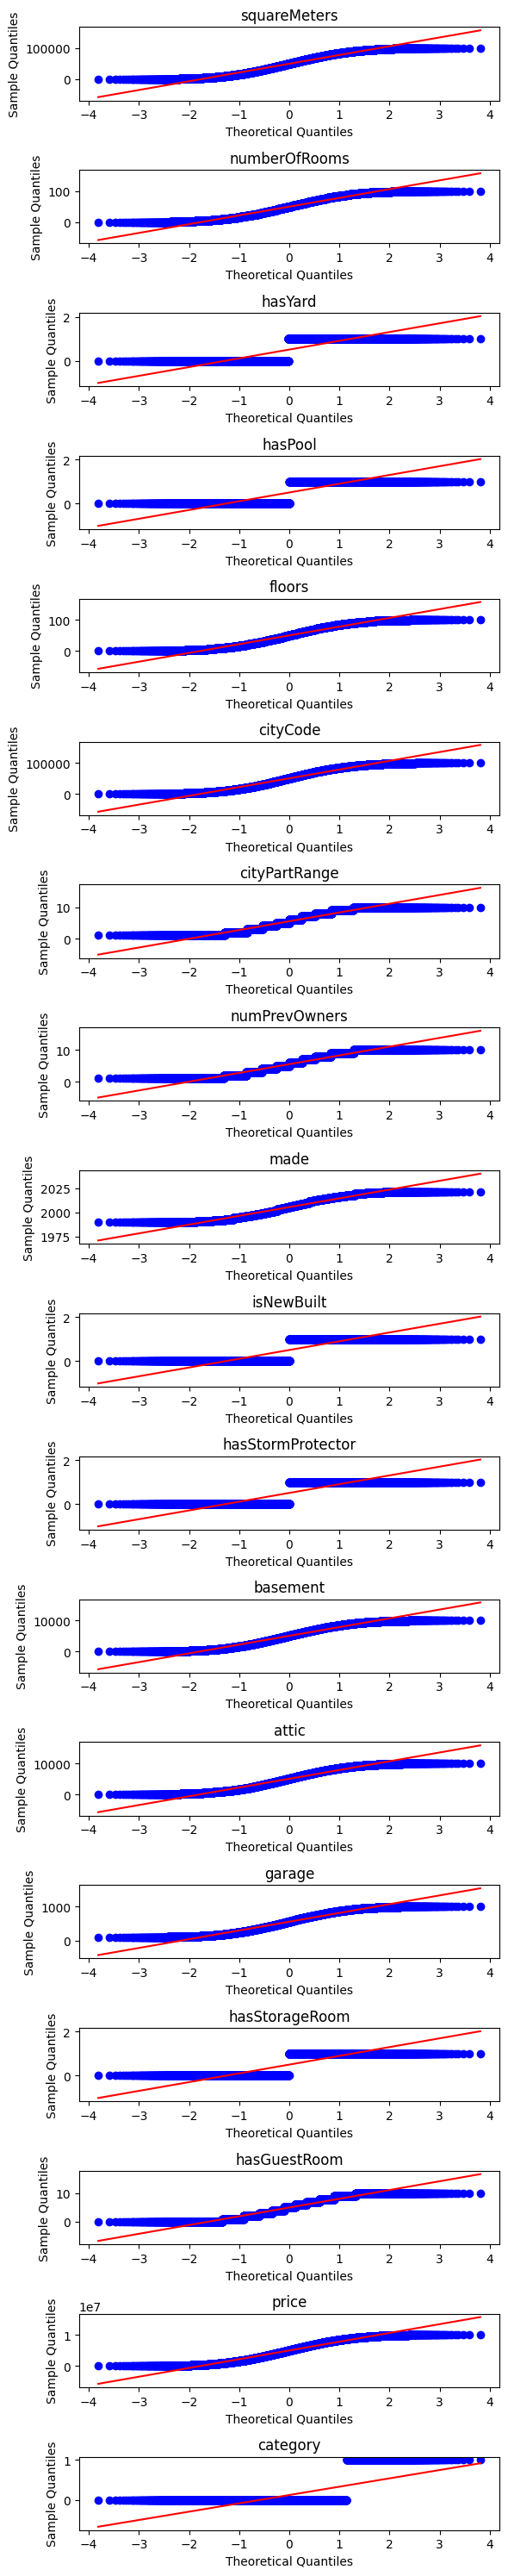

In [20]:
num_plots = df.shape[1]

fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(6, 30))

for i in range(num_plots):
    stats.probplot(df.iloc[:, i], plot=axes[i])
    axes[i].set_xlabel('Theoretical Quantiles')
    axes[i].set_ylabel('Sample Quantiles')
    axes[i].set_title(df.columns[i])

plt.tight_layout()
plt.show()

In [21]:
from scipy.stats import zscore

z_scores = zscore(df['category'])
outliers = (abs(z_scores) > 3)
print(df[outliers])

Empty DataFrame
Columns: [squareMeters, numberOfRooms, hasYard, hasPool, floors, cityCode, cityPartRange, numPrevOwners, made, isNewBuilt, hasStormProtector, basement, attic, garage, hasStorageRoom, hasGuestRoom, price, category]
Index: []


# Test Train Split

In [22]:
X = df.drop('category', axis = 1)
y = df['category']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=101)

In [23]:
X_train.shape, X_test.shape

((7000, 17), (3000, 17))

# Scaling Data

In [24]:
scaler_train = StandardScaler()
scaler_train.fit(X_train)
scaler_test = StandardScaler()
scaler_test.fit(X_test)
X_train = scaler_train.transform(X_train)
X_test = scaler_test.transform(X_test)

# Random Forest Classifier

In [25]:
classifier = RandomForestClassifier(n_estimators=100, max_features='auto', random_state=101)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', random_state=101)

# Prediction

In [26]:
y_pred = classifier.predict(X_test)
y_pred = pd.DataFrame(y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE =np.sqrt(MSE)
RMSE

0.0

# Evaluation

In [27]:
accuracy_score(y_test, y_pred)

1.0

# Confusion Matrix for prediction

In [28]:
confusion_matrix(y_test, y_pred)

array([[2617,    0],
       [   0,  383]])

# Classification Report

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2617
           1       1.00      1.00      1.00       383

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [30]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# sns.pairplot(df, diag_kind='kde', hue='category')
# plt.show()

# Removing Data and Imputation

In [31]:
# Simulate removing 1%, 5%, and 10% of data randomly
missing_percentages = [0.01, 0.05, 0.1]

for missing_percentage in missing_percentages:
    df_missing = df.copy()

    # Randomly setting a portion of the data to NaN in features
    mask_features = np.random.rand(df_missing.shape[0], df_missing.shape[1] - 1) < missing_percentage
    df_missing.iloc[:, :-1][mask_features] = np.nan

    # Randomly setting a portion of the data to NaN in target
    mask_target = np.random.rand(df_missing.shape[0]) < missing_percentage
    df_missing['category'][mask_target] = np.nan

    X = df_missing.drop('category', axis=1)
    y = df_missing['category']

    # Splitting the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Imputing missing values using three different methods
    imputation_methods = ['mean', 'median', 'most_frequent']

    for methods in imputation_methods:
        # Imputing missing values in features
        imputer_features = SimpleImputer(strategy=methods)
        X_train_imputed = pd.DataFrame(imputer_features.fit_transform(X_train), columns=X_train.columns)
        X_test_imputed = pd.DataFrame(imputer_features.transform(X_test), columns=X_test.columns)

        # Imputing missing values in target
        imputer_target = SimpleImputer(strategy='most_frequent')
        y_train_imputed = imputer_target.fit_transform(y_train.values.reshape(-1, 1)).ravel()
        y_test_imputed = imputer_target.transform(y_test.values.reshape(-1, 1)).ravel()

        # Training RandomForestClassifier on the imputed data
        classifier = RandomForestClassifier(n_estimators=100, max_features='auto', random_state=101)
        classifier.fit(X_train_imputed, y_train_imputed)

        # Making predictions on the test set
        y_pred = classifier.predict(X_test_imputed)

        # Calculating accuracy as a measure of how well the missing values were imputed
        accuracy = accuracy_score(y_test_imputed, y_pred)
        bias = np.mean(np.abs(y_test_imputed - y_pred))
        variance = np.var(y_pred)

        print(f"Imputation Methods: {methods}, Missing Percentage: {missing_percentage * 100}%")
        print(f"Imputation Accuracy: {accuracy}")
        print(f"Bias: {bias}")
        print(f"Variance: {variance}")
        # Generate confusion matrix
        conf_matrix = confusion_matrix(y_test_imputed, y_pred)
        print("Confusion Matrix:")
        print(conf_matrix)
        print("---------------------------------------------")

<ipython-input-31-a3a82927bfd1>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_missing['category'][mask_target] = np.nan
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Imputation Methods: mean, Missing Percentage: 1.0%
Imputation Accuracy: 0.9985
Bias: 0.0015
Variance: 0.11161599999999997
Confusion Matrix:
[[1744    3]
 [   0  253]]
---------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Imputation Methods: median, Missing Percentage: 1.0%
Imputation Accuracy: 0.9985
Bias: 0.0015
Variance: 0.11161599999999997
Confusion Matrix:
[[1744    3]
 [   0  253]]
---------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Imputation Methods: most_frequent, Missing Percentage: 1.0%
Imputation Accuracy: 0.9985
Bias: 0.0015
Variance: 0.11161599999999997
Confusion Matrix:
[[1744    3]
 [   0  253]]
---------------------------------------------


<ipython-input-31-a3a82927bfd1>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_missing['category'][mask_target] = np.nan
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Imputation Methods: mean, Missing Percentage: 5.0%
Imputation Accuracy: 0.9945
Bias: 0.0055
Variance: 0.11161599999999997
Confusion Matrix:
[[1744   11]
 [   0  245]]
---------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Imputation Methods: median, Missing Percentage: 5.0%
Imputation Accuracy: 0.9945
Bias: 0.0055
Variance: 0.11161599999999997
Confusion Matrix:
[[1744   11]
 [   0  245]]
---------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Imputation Methods: most_frequent, Missing Percentage: 5.0%
Imputation Accuracy: 0.9945
Bias: 0.0055
Variance: 0.11161599999999997
Confusion Matrix:
[[1744   11]
 [   0  245]]
---------------------------------------------


<ipython-input-31-a3a82927bfd1>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_missing['category'][mask_target] = np.nan
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Imputation Methods: mean, Missing Percentage: 10.0%
Imputation Accuracy: 0.986
Bias: 0.014
Variance: 0.11161599999999997
Confusion Matrix:
[[1744   28]
 [   0  228]]
---------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Imputation Methods: median, Missing Percentage: 10.0%
Imputation Accuracy: 0.986
Bias: 0.014
Variance: 0.11161599999999997
Confusion Matrix:
[[1744   28]
 [   0  228]]
---------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Imputation Methods: most_frequent, Missing Percentage: 10.0%
Imputation Accuracy: 0.986
Bias: 0.014
Variance: 0.11161599999999997
Confusion Matrix:
[[1744   28]
 [   0  228]]
---------------------------------------------


# **Answers**

# **What are the data types?**

The above dataset comprises of 1 *Categorical* column and 17 *Numerical* column

# **Are there missing values?**

There are no missing values in the above dataset, so there is no need for imputation or removal of missing values.

# **What are the likely distributions of the numeric variables?**



From the above Q-Q Plot, we could able to derive there are few features that roughly follows normal distribution. Those are,

*   squareMetes
*   numberOfRooms
*   hasYard
*   hasPool
*   floors
*   cityCode
*   basement
*   attic
*   garage
*   price

# Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

The identification of independent variables crucial for predicting the target variable (category) involves employing three distinct methods: correlation analysis, Ordinary Least Squares (OLS) regression, and Recursive Feature Elimination (RFE).


Firstly, through a correlation matrix, it becomes apparent that `hasYard`, `hasPool`, and `isNewBuilt` exhibit robust correlations with the target variable, suggesting their significance in classifying houses into "Luxury" or "Basic."


Secondly, the OLS method underscores the importance of `hasYard`, `hasPool`, `isNewBuilt`, and `made` as these variables display p-values of 0, indicating high statistical significance in influencing the target variable.


Lastly, employing Recursive Feature Elimination (RFE) identifies `hasYard`, `hasPool`, `cityCode`, `isNewBuilt`, and `basement` as key features contributing to the predictive accuracy of the model.


In essence, these three methods consistently highlight the significance of `hasYard`, `hasPool`, and `isNewBuilt` as influential factors in predicting the target variable, reinforcing their importance in classifying houses as "Luxury" or "Basic." The convergence of results from multiple methods strengthens the reliability of these identified features in the predictive modeling process.

# Which independent variables have missing data? How much?
No Independent variables have missing data in the above dataset

# Do the training and test sets have the same data?

No the training and test sets have different data with 7000 and 3000 rows respectively

# Is the predictor variables independent of all the other predictor variables?

Certain predictor variables such as `hasYard`, `hasPool`, and `isNewBuilt` exhibit a robust and significant dependency, establishing a strong correlation with the target variable `category`. These features play a crucial role in determining whether a house falls into the "**Luxury**" or "**Basic**" category.

On the other hand, there are a few predictor variables that show relatively weaker correlations, both positive and negative, with the target variable category. This implies that these features have a less pronounced impact on categorizing houses as "**Luxury**" or "**Basic**".

# Which predictor variables are the most important?

Since the predictor variables like `hasYard`, `hasPool`, and `isNewBuilt` have strong correlation with each other and the target (`category`), those are the most important features.

The absence of outliers in the predictor variables is confirmed through the Box Plot analysis. This signifies that the data points in these variables do not deviate significantly from the overall pattern, reinforcing the reliability of the dataset for analysis.

Moreover, this lack of outliers indicates that the determination of whether a house is categorized as "Basic" or "Luxury" is strongly influenced by the predictor variables. In simpler terms, the features we are considering play a crucial role in deciding the type of house.

Additionally, the average price for a "Luxury" house is `$5,005,929`, while a "Basic" house has an average price of `$4,907,260`. These average prices provide a quick insight into the typical costs associated with each category, showcasing the potential influence of pricing on the classification of houses as "Luxury" or "Basic."

# What are the distributions of the predictor variables?   

The predictor variables in the dataset exhibit a normal distribution, as evidenced by the Q-Q Plot. This graphical representation provides a visual confirmation of the normality assumption, indicating that the data points closely align with the theoretical quantiles expected for a normal distribution

# Remove outliers and keep outliers (does it have an effect of the final predictive model)?

Since the above dataset doesn't have any outliers, there's no effect of it towards the final predictive model. This is evident through z-scores.

# Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

By employing the SimpleImputer with mean, median, and most_frequent imputation strategies, the model demonstrated robust recovery of missing values, yielding high prediction accuracies. Specifically, for scenarios where 1%, 5%, and 10% of the data were randomly removed, the model achieved impressive accuracy rates of 99.9%, 99.5%, and 99.0%, respectively.

# Conclusion

From the analysis done above on the data set, it is clear that there exists a strong multi-collinearity, and strong linear relationship between variables - `hasYard`, `hasPool`, `isNewBuilt`, and the target (`category`).

# References



1.   Scikit-learn Documentation
2.   SciPy Documentation
3.   Statsmodel Documentation



